In [13]:
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data as wb
import pandas as pd
import yfinance as yf
from datetime import datetime

In [14]:
yf.pdr_override()

start_date = '18-04-2008'
end_date = '11-07-2021'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')

ticker = 'DB'

data = yf.download(ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [15]:
days = (data.index[-1] - data.index[0]).days
cagr = ((((data['Adj Close'][-1]) / data['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

CAGR = -14.099999999999998%


In [16]:
data['Returns'] = data['Adj Close'].pct_change()
vol = data['Returns'].std()*sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

Annual Volatility = 49.43%


In [17]:
result = []

In [18]:
S = data['Adj Close'][-1]

In [19]:
T = 750
mu = -0.1410
vol = 0.4943

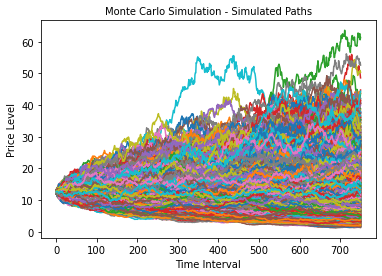

In [20]:
for i in range(10000):
    daily_returns=np.random.normal((1+mu)**(1/T),vol/sqrt(T),T)
    price_list = [S]
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    plt.plot(price_list)
    result.append(price_list[-1])
plt.xlabel('Time Interval',fontsize=10)
plt.ylabel('Price Level',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Price Level',fontsize=10)
plt.title('Monte Carlo Simulation - Simulated Paths',fontsize=10)
plt.show()

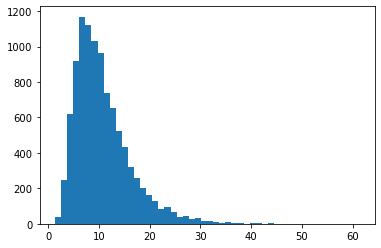

In [21]:
plt.hist(result,bins=50)
plt.show()

In [22]:
print(round(np.mean(result),2))

10.76


In [23]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

5% quantile = 4.208094976134603
95% quantile = 21.421789395363383


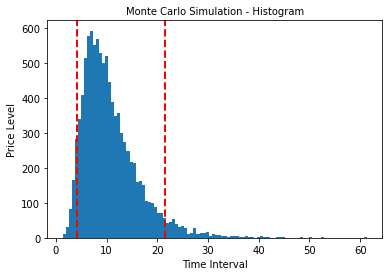

In [24]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Time Interval',fontsize=10)
plt.ylabel('Price Level',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Price Level',fontsize=10)
plt.title('Monte Carlo Simulation - Histogram',fontsize=10)
plt.show()